In [263]:
import numpy as np
import os 
import pandas as pd
#from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import ensemble, tree, linear_model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr
import pyodbc
import seaborn as sns

import re
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ks_2samp
from scipy.stats import norm
#import missingno as msno
import warnings
import datetime
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import nltk
#nltk.download('popular')
nltk.download('punkt')
nltk.download('wordnet')
import scipy.stats as stats

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eitanb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eitanb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [264]:
path = r"C:\Users\eitanb\Documents\GitHub\ML_Football_DS18\DATA"
path_result = r"C:\Users\eitanb\Documents\GitHub\ML_Football_DS18\result"

In [265]:
df_team=pd.read_csv(path+"/"+"team_results.csv")

In [266]:
df=df_team.copy()


In [267]:


def convert_categorical(df, threshold=10):
    """
    Convert columns with unique values less than threshold to 'category' dtype.
    """
    for col in df.columns:
        if df[col].nunique() < threshold:
            df[col] = df[col].astype('category')
    return df

def check_missing_values(df):
    """
    Generate a report of missing values in the dataset.
    """
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0].reset_index()
    missing_values.columns = ["Column", "Missing Values"]
    return missing_values

def check_duplicates(df):
    """
    Count the number of duplicate rows in the dataset.
    """
    return df.duplicated().sum()

def generate_summary_statistics(df):
    """
    Generate summary statistics for numerical columns.
    """
    return df.describe().T

def plot_distributions(df, cols):
    """
    Plot histograms for given numerical columns.
    """
    fig, axes = plt.subplots(1, len(cols), figsize=(6 * len(cols), 5))
    for i, col in enumerate(cols):
        sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
    plt.show()

def plot_correlation_heatmap(df):
    """
    Generate a heatmap showing correlations among numerical features.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap="coolwarm", annot=False, linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

def chi_square_test(df, col1, col2):
    """
    Perform a Chi-Square test for independence between two categorical columns.
    """
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return {"Chi2 Statistic": chi2, "p-value": p}

def t_test(df, numerical_col, categorical_col, group1, group2):
    """
    Perform a T-Test between two groups of a categorical variable on a numerical variable.
    """
    group1_data = df[df[categorical_col] == group1][numerical_col]
    group2_data = df[df[categorical_col] == group2][numerical_col]
    group3_data = df[df[categorical_col] == group3][numerical_col]
    t_stat, p_value = ttest_ind(group1_data, group2_data,group3_data, equal_var=False)
    return {"T-Statistic": t_stat, "p-value": p_value}

def ks_test(df, numerical_col, categorical_col, group1, group2):
    """
    Perform a Kolmogorov-Smirnov test to compare the distributions of a numerical variable between two groups.
    """
    group1_data = df[df[categorical_col] == group1][numerical_col]
    group2_data = df[df[categorical_col] == group2][numerical_col]
    ks_stat, p_value = ks_2samp(group1_data, group2_data)
    return {"KS Statistic": ks_stat, "p-value": p_value}




In [268]:
# Numeric categories, capping large values
df['homeGoals_cat'] = pd.Categorical(
    np.where(pd.to_numeric(df['homeGoals'], errors='coerce') > 5, 5, pd.to_numeric(df['homeGoals'], errors='coerce')),
    categories=[0, 1, 2, 3, 4, 5],
    ordered=True
)

df['awayGoals_cat'] = pd.Categorical(
    np.where(pd.to_numeric(df['awayGoals'], errors='coerce') > 5, 5, pd.to_numeric(df['awayGoals'], errors='coerce')),
    categories=[0, 1, 2, 3, 4, 5],
    ordered=True
)

df['homeGoalsHT_cat'] = pd.Categorical(
    np.where(pd.to_numeric(df['homeGoalsHalfTime'], errors='coerce') > 3, 3, pd.to_numeric(df['homeGoalsHalfTime'], errors='coerce')),
    categories=[0, 1, 2, 3],
    ordered=True
)

df['awayGoalsHT_cat'] = pd.Categorical(
    np.where(pd.to_numeric(df['awayGoalsHalfTime'], errors='coerce') > 3, 3, pd.to_numeric(df['awayGoalsHalfTime'], errors='coerce')),
    categories=[0, 1, 2, 3],
    ordered=True
)

df['redCards_h_cat'] = pd.Categorical(
    np.where(pd.to_numeric(df['redCards_h'], errors='coerce') > 0, 1, 0),
    categories=[0, 1]
)

df['redCards_a_cat'] = pd.Categorical(
    np.where(pd.to_numeric(df['redCards_a'], errors='coerce') > 0, 1, 0),
    categories=[0, 1]
)

df['ownGoals_h_cat'] = pd.Categorical(
    np.where(pd.to_numeric(df['ownGoals_h'], errors='coerce') > 0, 1, 0),
    categories=[0, 1]
)

df['ownGoals_a_cat'] = pd.Categorical(
    np.where(pd.to_numeric(df['ownGoals_a'], errors='coerce') > 0, 1, 0),
    categories=[0, 1]
)

df['yellowCards_h_cat'] = pd.Categorical(
    np.where(pd.to_numeric(df['yellowCards_h'], errors='coerce') > 5, 5, pd.to_numeric(df['yellowCards_h'], errors='coerce')),
    categories=[0, 1, 2, 3, 4, 5],
    ordered=True
)

df['yellowCards_a_cat'] = pd.Categorical(
    np.where(pd.to_numeric(df['yellowCards_a'], errors='coerce') > 5, 5, pd.to_numeric(df['yellowCards_a'], errors='coerce')),
    categories=[0, 1, 2, 3, 4, 5],
    ordered=True
)

df['total_assists_h_cat'] = pd.Categorical(
    np.where(pd.to_numeric(df['total_assists_h'], errors='coerce') > 5, 5, pd.to_numeric(df['total_assists_h'], errors='coerce')),
    categories=[0, 1, 2, 3, 4, 5],
    ordered=True
)

df['total_assists_a_cat'] = pd.Categorical(
    np.where(pd.to_numeric(df['total_assists_a'], errors='coerce') > 5, 5, pd.to_numeric(df['total_assists_a'], errors='coerce')),
    categories=[0, 1, 2, 3, 4, 5],
    ordered=True
)



In [269]:
# change result_h to category
df['result'] = df['result_h'].map({'W': 2, 'D': 1, 'L': 0})

In [270]:
# add random of missing data
def introduce_nan(df, columns, fraction=0.05, random_state=None):
    """
    Introduce NaN values in random locations in specified columns.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of column names to introduce NaN values.
    fraction (float): The fraction of values to replace with NaN (default: 0.1).
    random_state (int): Seed for reproducibility (optional).

    Returns:
    pd.DataFrame: DataFrame with NaN values introduced.
    """
    df_copy = df.copy()
    np.random.seed(random_state)
    
    for col in columns:
        num_nan = int(len(df) * fraction)  # Number of NaNs to introduce
        nan_indices = np.random.choice(df.index, num_nan, replace=False)
        df_copy.loc[nan_indices, col] = np.nan
    
    return df_copy
df = introduce_nan(df, columns=['xGoals_h', 'xGoals_a','deep_h','deep_a'], fraction=0.05, random_state=42)

In [271]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12680 entries, 0 to 12679
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gameID                 12680 non-null  int64   
 1   leagueID               12680 non-null  int64   
 2   season                 12680 non-null  int64   
 3   date                   12680 non-null  object  
 4   homeTeamID             12680 non-null  int64   
 5   awayTeamID             12680 non-null  int64   
 6   homeGoals              12680 non-null  int64   
 7   awayGoals              12680 non-null  int64   
 8   homeGoalsHalfTime      12680 non-null  int64   
 9   awayGoalsHalfTime      12680 non-null  int64   
 10  xGoals_h               12046 non-null  float64 
 11  shots_h                12680 non-null  int64   
 12  shotsOnTarget_h        12680 non-null  int64   
 13  deep_h                 12046 non-null  float64 
 14  ppda_h                 12680 non-null 

## Data Protocol 

#### Exporting results to the protocol

import pandas as pd



with pd.ExcelWriter(file_path) as writer:
    df.dtypes.to_frame(name="Data Type").to_excel(writer, sheet_name="data_type")  # Convert dtype Series to DataFrame
    df.max().to_frame(name="Max Values").to_excel(writer, sheet_name="max")  # Convert max Series to DataFrame
    df.min().to_frame(name="Min Values").to_excel(writer, sheet_name="min")  # Convert min Series to DataFrame
    df.isnull().sum().to_frame(name="NAN Count").to_excel(writer, sheet_name="NAN")  # Get count of NaN values
    df.nunique().to_frame(name="Unique Values").to_excel(writer, sheet_name="unique")  # Unique value count


In [272]:
# Define the file path
file_path = path_result + "/Football_data_protocol.xlsx"

with pd.ExcelWriter(file_path) as writer:
    # Data types
    df.dtypes.to_frame(name="Data Type").to_excel(writer, sheet_name="data_type")
    
    # Max/Min for numeric
    df.select_dtypes(include='number').max().to_frame(name="Max Values").to_excel(writer, sheet_name="max")
    df.select_dtypes(include='number').min().to_frame(name="Min Values").to_excel(writer, sheet_name="min")
    
    # Null counts
    df.isnull().sum().to_frame(name="NAN Count").to_excel(writer, sheet_name="NAN")

    # Category counts (value_counts)
    category_cols = df.select_dtypes(include=['object', 'category'])

    # Build long-format DataFrame
    category_counts = []

    for col in category_cols.columns:
        vc = df[col].value_counts(dropna=False).reset_index()
        vc.columns = ['category', 'count']
        vc['column'] = col
        category_counts.append(vc)

    category_counts_df = pd.concat(category_counts, ignore_index=True)[['column', 'category', 'count']]

    # Export to Excel
    category_counts_df.to_excel(writer, sheet_name="category_counts", index=False)

#### categories, numeric and dummy

In [273]:
def convert_categorical(df, threshold=10):
    """
    Convert columns with unique values less than threshold to 'category' dtype.
    """
    for col in df.columns:
        if df[col].nunique() < threshold:
            df[col] = df[col].astype('category')
    return df


In [274]:
# categories
df=convert_categorical(df, threshold=13)
categorical_columns=["season", "leagueID","game_year", "game_month","game_day",'awayGoals','homeGoals','teamgoals_a', 'teamgoals_h', 'yellowCards_a']
# Convert to categorical
df[categorical_columns] = df[categorical_columns].astype("category")

# Filter out the categorical columns
categorical_df = df.select_dtypes(include=['category'])

In [275]:
# Get all numeric columns
df_num = df.select_dtypes(include=['number']).columns.dropna().unique()

# Drop specific ID columns (if they exist)
df_num = df_num.difference(['gameID', 'homeTeamID', 'awayTeamID'])

## Descriptive Statistics

In [276]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

AV = AutoViz_Class()
AV.AutoViz(df)

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (12680, 63)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  16
    Number of Integer-Categorical Columns =  12
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  33
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  1
    Numbe

Number of All Scatter Plots = 136


KeyboardInterrupt: 

In [277]:

df.describe().T

count      mean          std        min    \
gameID                 12680.0  7877.707334  4753.774045  81.0000   
homeTeamID             12680.0   135.324842    42.757999  71.0000   
awayTeamID             12680.0   135.333517    42.767761  71.0000   
xGoals_h               12046.0     1.502816     0.890704   0.0000   
shots_h                12680.0    13.706782     5.264559   0.0000   
shotsOnTarget_h        12680.0     4.742350     2.578636   0.0000   
deep_h                 12046.0     6.429520     4.288841   0.0000   
ppda_h                 12680.0    10.495906     5.609321   1.8974   
fouls_h                12680.0    12.796136     4.152450   0.0000   
corners_h              12680.0     5.487618     2.955970   0.0000   
total_xAssists_h       12680.0     1.060799     0.702824   0.0000   
total_key_passes_h     12680.0    10.126025     4.357502   0.0000   
total_xGoalsChain_h    12680.0     3.977122     3.268582   0.0000   
total_xGoalsBuildup_h  12680.0     2.334217     2.309113   0.0000   
total_blocked_shots_h  12677.0     3.471799     2.348723   0.0000   
total_saved_shots_h    12677.0     3.258579     2.142751   0.0000   
xGoals_a               12046.0     1.180865     0.779036   0.0000   
shots_a                12680.0    11.216719     4.656769   0.0000   
shotsOnTarget_a        12680.0     3.892587     2.281611   0.0000   
deep_a                 12046.0     5.215839     3.710316   0.0000   
ppda_a                 12680.0    11.835520     6.925258   2.1220   
fouls_a                12680.0    13.114984     4.249684   0.0000   
corners_a              12680.0     4.467823     2.603438   0.0000   
total_xAssists_a       12680.0     0.844537     0.617374   0.0000   
total_key_passes_a     12680.0     8.336909     3.846846   0.0000   
total_xGoalsChain_a    12680.0     3.190858     2.843056   0.0000   
total_xGoalsBuildup_a  12680.0     1.882442     2.003191   0.0000   
total_blocked_shots_a  12672.0     2.839331     2.084720   0.0000   
total_saved_shots_a    12672.0     2.721907     1.885106   0.0000   

                           25%          50%           75%           max      
gameID                 3812.750000  7981.500000  12023.250000  16135.000000  
homeTeamID              101.000000   132.000000    163.000000    262.000000  
awayTeamID              101.000000   132.000000    163.000000    262.000000  
xGoals_h                  0.838674     1.345425      2.008520      6.630490  
shots_h                  10.000000    13.000000     17.000000     47.000000  
shotsOnTarget_h           3.000000     4.000000      6.000000     18.000000  
deep_h                    3.000000     6.000000      9.000000     42.000000  
ppda_h                    6.814800     9.250000     12.613525     97.333300  
fouls_h                  10.000000    13.000000     15.000000     33.000000  
corners_h                 3.000000     5.000000      7.000000     20.000000  
total_xAssists_h          0.539598     0.925869      1.425774      5.512622  
total_key_passes_h        7.000000    10.000000     13.000000     38.000000  
total_xGoalsChain_h       1.640195     3.092461      5.382086     32.011994  
total_xGoalsBuildup_h     0.748686     1.597885      3.166327     24.437683  
total_blocked_shots_h     2.000000     3.000000      5.000000     19.000000  
total_saved_shots_h       2.000000     3.000000      4.000000     17.000000  
xGoals_a                  0.593222     1.032480      1.604460      6.186960  
shots_a                   8.000000    11.000000     14.000000     39.000000  
shotsOnTarget_a           2.000000     4.000000      5.000000     15.000000  
deep_a                    3.000000     4.000000      7.000000     28.000000  
ppda_a                    7.483625    10.229700     14.190950    152.000000  
fouls_a                  10.000000    13.000000     16.000000     32.000000  
corners_a                 3.000000     4.000000      6.000000     19.000000  
total_xAssists_a          0.381555     0.714704      1.145983      5.463750  
tot

In [278]:
df.iloc[:,:30].describe()

gameID      homeTeamID    awayTeamID     xGoals_h       shots_h    \
count  12680.000000  12680.000000  12680.000000  12046.000000  12680.000000   
mean    7877.707334    135.324842    135.333517      1.502816     13.706782   
std     4753.774045     42.757999     42.767761      0.890704      5.264559   
min       81.000000     71.000000     71.000000      0.000000      0.000000   
25%     3812.750000    101.000000    101.000000      0.838674     10.000000   
50%     7981.500000    132.000000    132.000000      1.345425     13.000000   
75%    12023.250000    163.000000    163.000000      2.008520     17.000000   
max    16135.000000    262.000000    262.000000      6.630490     47.000000   

       shotsOnTarget_h     deep_h        ppda_h        fouls_h    \
count   12680.000000    12046.000000  12680.000000  12680.000000   
mean        4.742350        6.429520     10.495906     12.796136   
std         2.578636        4.288841      5.609321      4.152450   
min         0.000000        0.000000      1.897400      0.000000   
25%         3.000000        3.000000      6.814800     10.000000   
50%         4.000000        6.000000      9.250000     13.000000   
75%         6.000000        9.000000     12.613525     15.000000   
max        18.000000       42.000000     97.333300     33.000000   

         corners_h   total_xAssists_h  total_key_passes_h  \
count  12680.000000    12680.000000       12680.000000      
mean       5.487618        1.060799          10.126025      
std        2.955970        0.702824           4.357502      
min        0.000000        0.000000           0.000000      
25%        3.000000        0.539598           7.000000      
50%        5.000000        0.925869          10.000000      
75%        7.000000        1.425774          13.000000      
max       20.000000        5.512622          38.000000      

       total_xGoalsChain_h  total_xGoalsBuildup_h  total_blocked_shots_h  \
count     12680.000000          12680.000000           12677.000000        
mean          3.977122              2.334217               3.471799        
std           3.268582              2.309113               2.348723        
min           0.000000              0.000000               0.000000        
25%           1.640195              0.748686               2.000000        
50%           3.092461              1.597885               3.000000        
75%           5.382086              3.166327               5.000000        
max          32.011994             24.437683              19.000000        

       total_saved_shots_h    xGoals_a       shots_a    
count     12677.000000      12046.000000  12680.000000  
mean          3.258579          1.180865     11.216719  
std           2.142751          0.779036      4.656769  
min           0.000000          0.000000      0.000000  
25%           2.000000          0.593222      8.000000  
50%           3.000000          1.032480     11.000000  
75%           4.000000          1.604460     14.000000  
max          17.000000          6.186960     39.000000

In [279]:
df.iloc[:,30:60].describe()

shotsOnTarget_a     deep_a        ppda_a        fouls_a    \
count   12680.000000    12046.000000  12680.000000  12680.000000   
mean        3.892587        5.215839     11.835520     13.114984   
std         2.281611        3.710316      6.925258      4.249684   
min         0.000000        0.000000      2.122000      0.000000   
25%         2.000000        3.000000      7.483625     10.000000   
50%         4.000000        4.000000     10.229700     13.000000   
75%         5.000000        7.000000     14.190950     16.000000   
max        15.000000       28.000000    152.000000     32.000000   

         corners_a   total_xAssists_a  total_key_passes_a  \
count  12680.000000    12680.000000       12680.000000      
mean       4.467823        0.844537           8.336909      
std        2.603438        0.617374           3.846846      
min        0.000000        0.000000           0.000000      
25%        3.000000        0.381555           6.000000      
50%        4.000000        0.714704           8.000000      
75%        6.000000        1.145983          11.000000      
max       19.000000        5.463750          27.000000      

       total_xGoalsChain_a  total_xGoalsBuildup_a  total_blocked_shots_a  \
count     12680.000000          12680.000000           12672.000000        
mean          3.190858              1.882442               2.839331        
std           2.843056              2.003191               2.084720        
min           0.000000              0.000000               0.000000        
25%           1.171229              0.530240               1.000000        
50%           2.380038              1.229509               2.000000        
75%           4.365387              2.547429               4.000000        
max          34.587459             27.419105              16.000000        

       total_saved_shots_a  
count     12672.000000      
mean          2.721907      
std           1.885106      
min           0.000000      
25%           1.000000      
50%           2.000000      
75%           4.000000      
max          13.000000

In [280]:
# categoriel dscribe
categorical_df.describe()

leagueID  season  homeGoals  awayGoals  homeGoalsHalfTime  \
count     12680    12680    12680      12680          12680         
unique        5        7       11         10              7         
top           1     2014        1          1              0         
freq       2660     1826     4086       4458           6494         

        awayGoalsHalfTime  yellowCards_h  redCards_h  teamgoals_h  ownGoals_h  \
count         12680           12679.0        12680       12680        12680     
unique            6               9.0            4          11            3     
top               0               2.0            0           1            0     
freq           7550            3630.0        11602        4140        12245     

        total_assists_h  yellowCards_a  redCards_a  teamgoals_a  ownGoals_a  \
count        12680           12680         12680       12680        12680     
unique           9              10             4          10            4     
top              0               2             0           1            0     
freq          4785            3605         11284        4464        12117     

        total_assists_a result_h  game_year  game_month  game_day  \
count        12680        12680     12680       12680      12680    
unique           9            3         8          12         31    
top              0            W      2017          12         20    
freq          5812         5654      1877        1527        567    

        homeGoals_cat  awayGoals_cat  homeGoalsHT_cat  awayGoalsHT_cat  \
count       12680          12680           12680            12680        
unique          6              6               4                4        
top             1              1               0                0        
freq         4086           4458            6494             7550        

        redCards_h_cat  redCards_a_cat  ownGoals_h_cat  ownGoals_a_cat  \
count        12680           12680           12680           12680       
unique           2               2               2               2       
top              0               0               0               0       
freq         11602           11284           12245           12117       

        yellowCards_h_cat  yellowCards_a_cat  total_assists_h_cat  \
count         12679              12680               12680          
unique            6                  6                   6          
top               2                  2                   0          
freq           3630               3605                4785          

        total_assists_a_cat  result  
count          12680          12680  
unique             6              3  
top                0              2  
freq            5812           5654

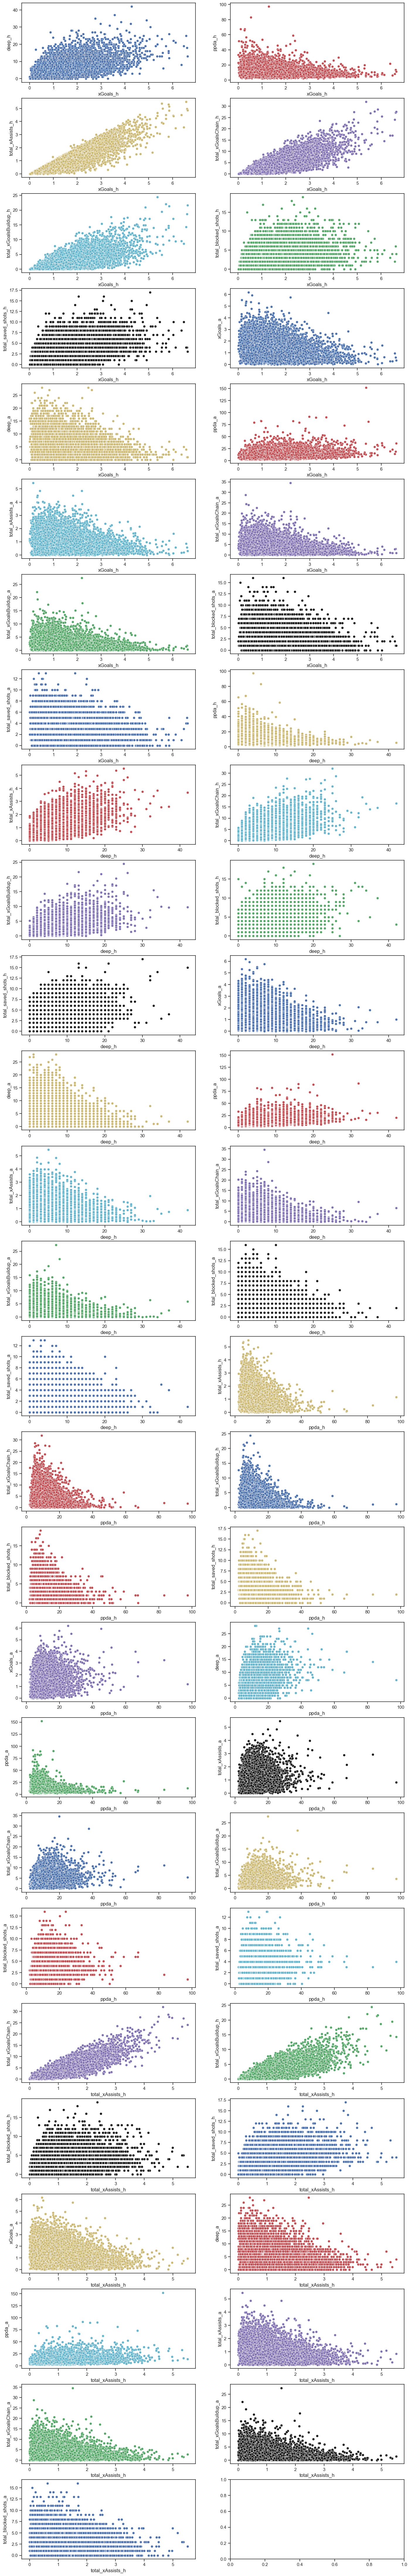

In [281]:
axes = df[df_num].hist(figsize=(120, 120), bins=35, xlabelsize=50, ylabelsize=8, color="navy")

# Loop through each AxesSubplot and set the title size
for ax in axes.flatten():
    ax.title.set_fontsize(60)  # 👈 change this number to your desired title size

plt.tight_layout()
plt.show()

In [282]:
import pandas as pd
from scipy.stats import normaltest

# Define the highlight function for styling
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    return default

# Numerical columns from df
df_num = df.select_dtypes(include='number').columns

# Calculate skewness
skew_df = pd.DataFrame(df[df_num].skew(), columns=['skewness'])
skew_df = skew_df.sort_values(by='skewness', ascending=False)

# Check for normality
normal = []
not_normal = []

for col in df_num:
    stat, p = normaltest(df[col].dropna())
    if p > 0.05:
        normal.append(col)
    else:
        not_normal.append(col)

# Display skewness with color highlighting
display(skew_df.style.applymap(highlight))

# Output lists of normal and not normal variables
print("✅ Normally Distributed Variables:")
print(normal)

print("\n❌ Not Normally Distributed Variables:")
print(not_normal)


✅ Normally Distributed Variables:
[]

❌ Not Normally Distributed Variables:
['gameID', 'homeTeamID', 'awayTeamID', 'xGoals_h', 'shots_h', 'shotsOnTarget_h', 'deep_h', 'ppda_h', 'fouls_h', 'corners_h', 'total_xAssists_h', 'total_key_passes_h', 'total_xGoalsChain_h', 'total_xGoalsBuildup_h', 'total_blocked_shots_h', 'total_saved_shots_h', 'xGoals_a', 'shots_a', 'shotsOnTarget_a', 'deep_a', 'ppda_a', 'fouls_a', 'corners_a', 'total_xAssists_a', 'total_key_passes_a', 'total_xGoalsChain_a', 'total_xGoalsBuildup_a', 'total_blocked_shots_a', 'total_saved_shots_a']


In [283]:
import pandas as pd
from scipy.stats import normaltest

# Define highlight function for kurtosis values
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 4:
        return highlight
    elif cell_value < 2:
        return negative
    else:
        return default

# Numerical columns only
df_num = df.select_dtypes(include='number').columns

# Calculate kurtosis
kurtosis_df = pd.DataFrame(df[df_num].kurt(), columns=['Kurtosis'])
kurtosis_df = kurtosis_df.sort_values(by='Kurtosis', ascending=False)

# Check normality
normal = []
not_normal = []

for col in df_num:
    col_data = df[col].dropna()
    if len(col_data) >= 8:  # required minimum for normaltest
        stat, p = normaltest(col_data)
        if p > 0.05:
            normal.append(col)
        else:
            not_normal.append(col)
    else:
        not_normal.append(col)  # not enough data to test reliably

# Display kurtosis with highlighting
display(kurtosis_df.style.applymap(highlight))

# Output the normality classification
print("✅ Normally Distributed Variables:")
print(normal)

print("\n❌ Not Normally Distributed Variables:")
print(not_normal)


✅ Normally Distributed Variables:
[]

❌ Not Normally Distributed Variables:
['gameID', 'homeTeamID', 'awayTeamID', 'xGoals_h', 'shots_h', 'shotsOnTarget_h', 'deep_h', 'ppda_h', 'fouls_h', 'corners_h', 'total_xAssists_h', 'total_key_passes_h', 'total_xGoalsChain_h', 'total_xGoalsBuildup_h', 'total_blocked_shots_h', 'total_saved_shots_h', 'xGoals_a', 'shots_a', 'shotsOnTarget_a', 'deep_a', 'ppda_a', 'fouls_a', 'corners_a', 'total_xAssists_a', 'total_key_passes_a', 'total_xGoalsChain_a', 'total_xGoalsBuildup_a', 'total_blocked_shots_a', 'total_saved_shots_a']


#### most of my data is skewed the result from skewness and Kurtosis showed that  only 5 columns are close to Normal distribution(Kurtosis=3), 10 are The distribution has heavier tails than normal (Kurtosis>3) and all the rest are The distribution has lighter tails than normal (Kurtosis<3). we will see the outliers checks later

#### all of the columns are positive skewed (skewness > 0) 20 of them with right tail (skewness > 1)

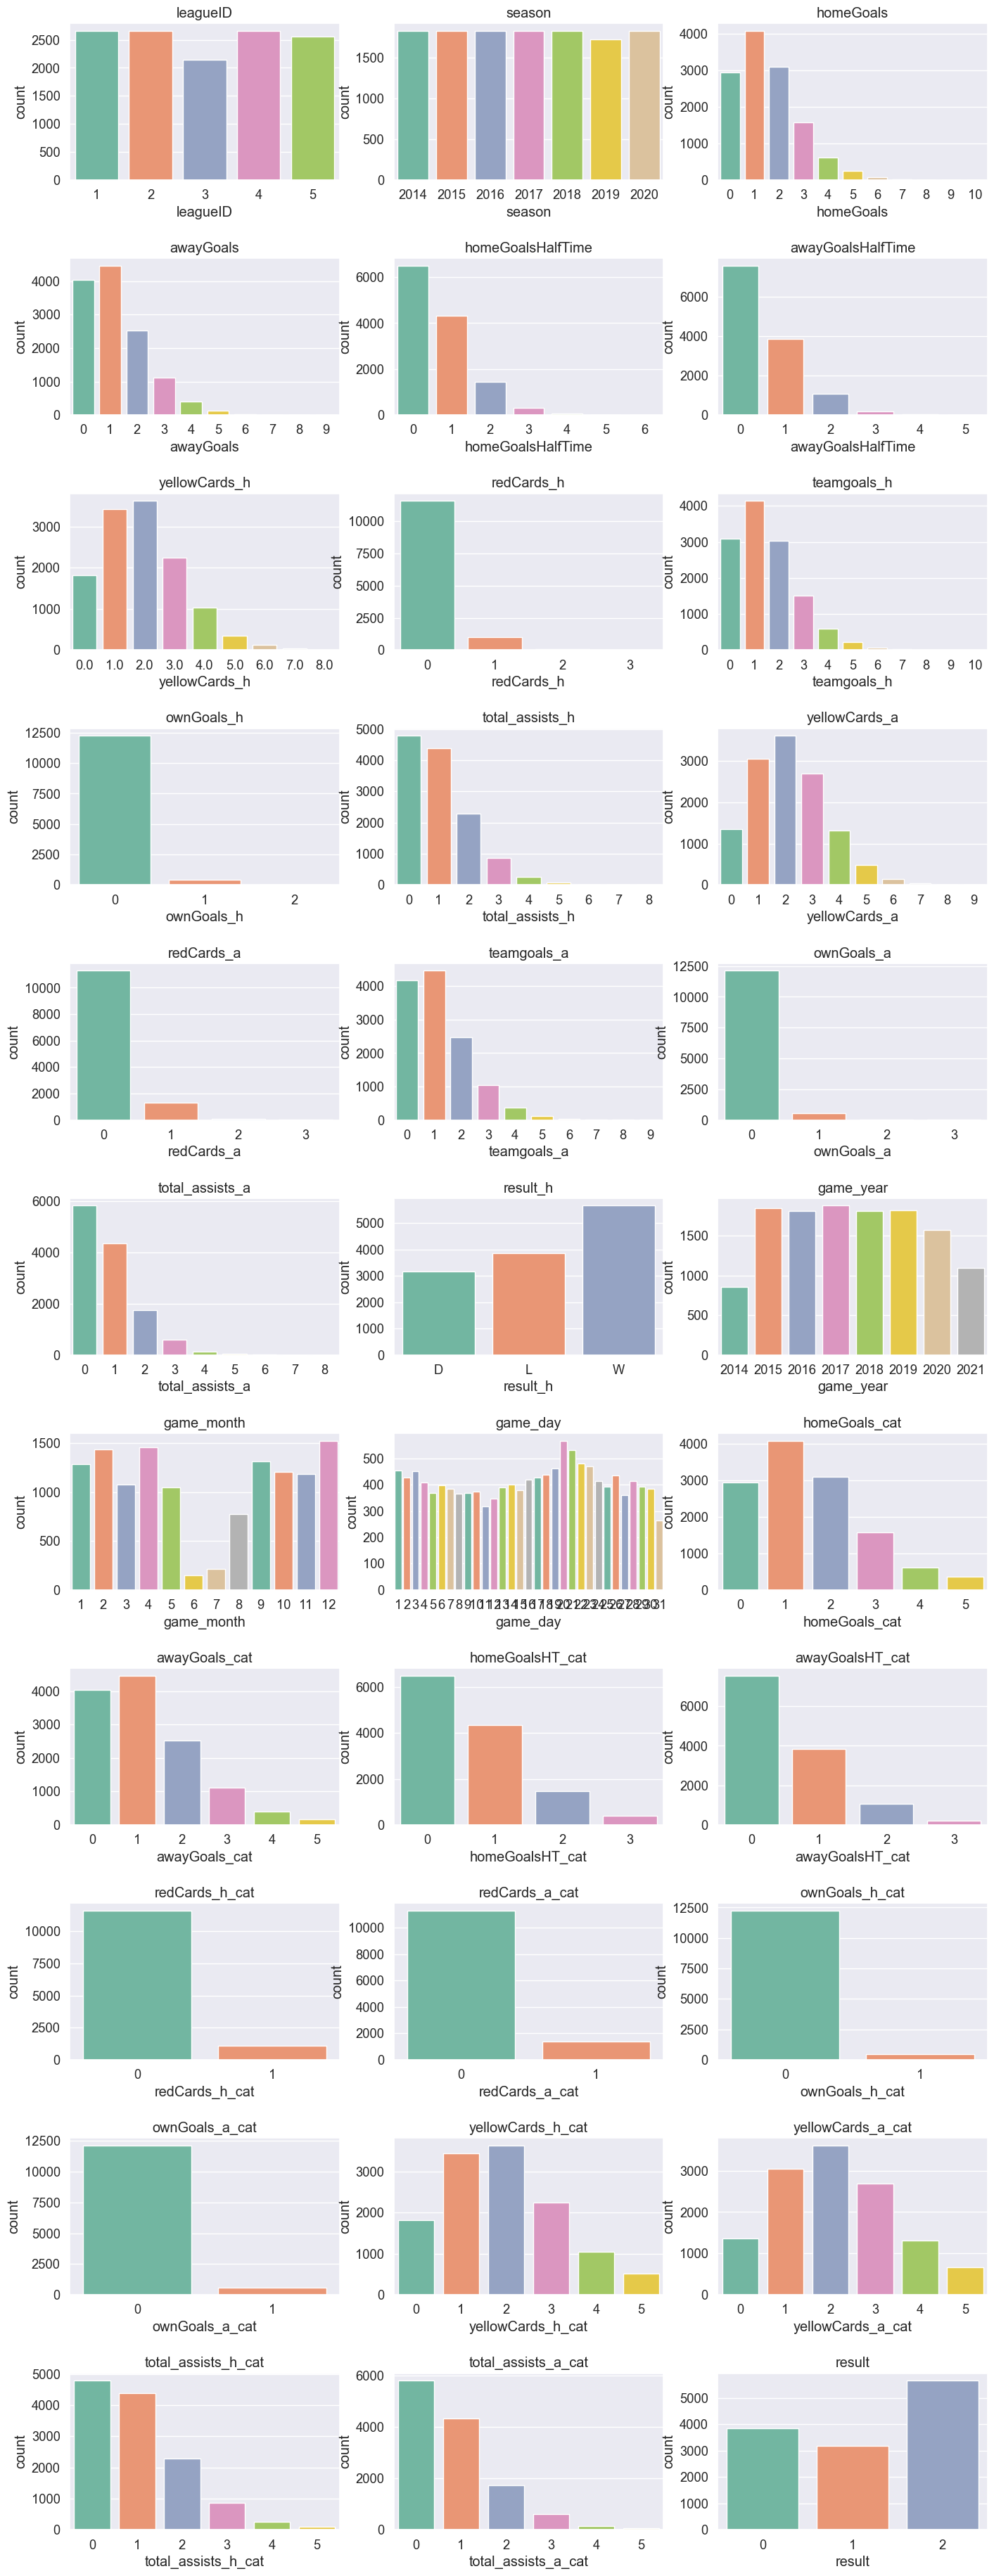

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

b = min(3, len(categorical_df.columns)) 
# Define number of rows and columns dynamically based on data
num_plots = len(categorical_df.columns)
rows = math.ceil(num_plots / b)  # Adjust rows dynamically

# Choose a color palette
palette_choice = "Set2"  

# Create figure
fig = plt.figure(figsize=(b * 5, rows * 4))  # Scale size dynamically
plt.subplots_adjust(hspace=0.5)
sns.set(font_scale=1.2)  

# Loop through categorical columns and plot
for i, col in enumerate(categorical_df.columns, 1):  
    plt.subplot(rows, b, i)
    plt.title(col)
    
    # Count plot with color palette
    sns.countplot(x=col, data=categorical_df, palette=palette_choice)  

plt.show()


### Distribution of the target variable

In [285]:
df['result_h'].value_counts()

result_h
W    5654
L    3854
D    3172
Name: count, dtype: int64

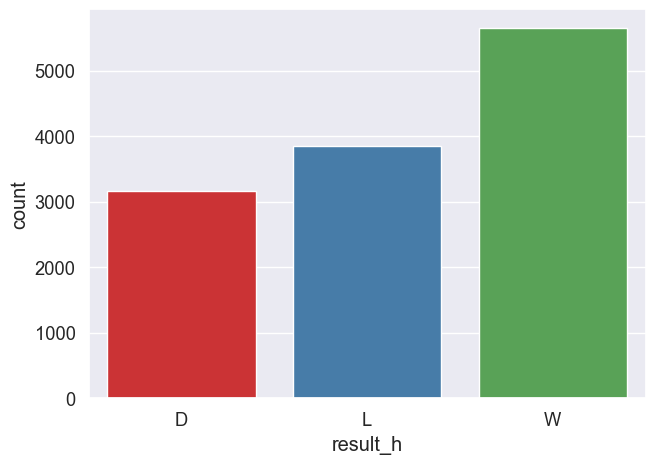

In [286]:
#fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(x=df['result_h'].dropna(),data=df, palette="Set1")
plt.show()

#### most of the target results are for wining by the home team

## Correlation

### we will use spearman correlation since our data is not normal distribution

In [287]:
corr = df[df_num].corr(method = 'spearman')
corr.style.background_gradient(cmap='coolwarm')

In [288]:
def chi_square_test(df, col1, col2):
    """
    Perform a Chi-Square test for independence between two categorical columns.
    """
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return {"Chi2 Statistic": chi2, "p-value": p}

def t_test(df, numerical_col, categorical_col, group1, group2):
    """
    Perform a T-Test between two groups of a categorical variable on a numerical variable.
    """
    group1_data = df[df[categorical_col] == group1][numerical_col]
    group2_data = df[df[categorical_col] == group2][numerical_col]
    group3_data = df[df[categorical_col] == group3][numerical_col]
    t_stat, p_value = ttest_ind(group1_data, group2_data,group3_data, equal_var=False)
    return {"T-Statistic": t_stat, "p-value": p_value}

In [289]:
# Define Chi-Square test function
def chi_square_tests(df, target_col, categorical_cols):
    """
    Perform Chi-Square tests for independence between a target categorical column 
    and multiple categorical columns.

    Parameters:
    - df: pandas DataFrame
    - target_col: The target categorical column to compare against
    - categorical_cols: List of categorical columns to test

    Returns:
    - DataFrame with Chi-Square statistic and p-value for each test
    """
    results = []

    for col in categorical_cols:
        if col != target_col:  # Avoid testing the column against itself
            contingency_table = pd.crosstab(df[target_col], df[col])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            results.append({"Category": col, "Chi2 Statistic": chi2, "p-value": p})

    return pd.DataFrame(results)

# Identify categorical columns (excluding the target column)
categorical_columns = categorical_df.columns.tolist()
target_column = "result_h"  # Assuming 'result_h' is the target column

# Run Chi-Square tests on all categorical variables
chi_square_results = chi_square_tests(categorical_df, target_column, categorical_columns)
chi_square_results

Category        Chi2 Statistic     p-value  
0              leagueID      10.269471   2.466197e-01
1                season      38.107108   1.474900e-04
2             homeGoals    6442.602264   0.000000e+00
3             awayGoals    6075.093708   0.000000e+00
4     homeGoalsHalfTime    2545.653402   0.000000e+00
5     awayGoalsHalfTime    2532.813172   0.000000e+00
6         yellowCards_h     204.061606   1.196222e-34
7            redCards_h     218.341445   2.349069e-44
8           teamgoals_h    6231.085197   0.000000e+00
9            ownGoals_h     142.809203   7.065481e-30
10      total_assists_h    4348.474424   0.000000e+00
11        yellowCards_a      54.161673   1.731651e-05
12           redCards_a     149.238732   1.120813e-29
13          teamgoals_a    5917.445096   0.000000e+00
14           ownGoals_a     155.514889   5.272227e-31
15      total_assists_a    4417.535529   0.000000e+00
16            game_year      39.096493   3.524182e-04
17           game_month      19.885573   5.901973e-01
18             game_day      59.638372   4.888877e-01
19        homeGoals_cat    6442.602264   0.000000e+00
20        awayGoals_cat    6075.093708   0.000000e+00
21      homeGoalsHT_cat    2545.207277   0.000000e+00
22      awayGoalsHT_cat    2531.679800   0.000000e+00
23       redCards_h_cat     208.284982   5.908686e-46
24       redCards_a_cat     140.307973   3.408088e-31
25       ownGoals_h_cat     139.589717   4.880655e-31
26       ownGoals_a_cat     152.443935   7.892600e-34
27    yellowCards_h_cat     199.199504   2.370361e-37
28    yellowCards_a_cat      46.548864   1.140457e-06
29  total_assists_h_cat    4348.474424   0.000000e+00
30  total_assists_a_cat    4417.535529   0.000000e+00
31               result   25360.000000   0.000000e+00

In [290]:
from scipy.stats import f_oneway, ttest_ind

def perform_anova(df, categorical_col):
    """
    Perform ANOVA test for all numerical columns against a categorical variable.
    
    Parameters:
    - df: pandas DataFrame
    - categorical_col: The categorical column to compare against (e.g., 'result_h')
    
    Returns:
    - DataFrame containing ANOVA results (F-statistic and p-value) for each numerical column
    """
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    results = []

    for col in numerical_cols:
        groups = [df[df[categorical_col] == group][col].dropna() for group in df[categorical_col].unique()]
        
        if len(groups) > 1:
            f_stat, p_value = f_oneway(*groups)
            results.append({"Numerical Feature": col, "F-Statistic": f_stat, "p-value": p_value})

    return pd.DataFrame(results)


def perform_t_tests(df, categorical_col):
    """
    Perform pairwise T-Tests for all numerical columns against a categorical variable with three groups.
    
    Parameters:
    - df: pandas DataFrame
    - categorical_col: The categorical column to compare against (e.g., 'result_h')
    
    Returns:
    - DataFrame containing T-test results for each numerical column between each pair of groups.
    """
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    groups = df[categorical_col].unique()
    results = []

    for col in numerical_cols:
        for i in range(len(groups)):
            for j in range(i + 1, len(groups)):
                group1 = df[df[categorical_col] == groups[i]][col].dropna()
                group2 = df[df[categorical_col] == groups[j]][col].dropna()

                t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
                results.append({
                    "Numerical Feature": col,
                    "Group 1": groups[i],
                    "Group 2": groups[j],
                    "T-Statistic": t_stat,
                    "p-value": p_value
                })

    return pd.DataFrame(results)


# Run ANOVA for all numerical columns
anova_results = perform_anova(df, "result_h")

# Run T-Tests for pairwise comparisons
t_test_results = perform_t_tests(df, "result_h")




In [291]:
anova_results

Numerical Feature     F-Statistic     p-value   
0                  gameID     9.266700   9.516170e-05
1              homeTeamID    33.335962   3.633404e-15
2              awayTeamID    39.899400   5.323790e-18
3                xGoals_h  1466.258209   0.000000e+00
4                 shots_h   220.789503   5.553579e-95
5         shotsOnTarget_h  1279.749618   0.000000e+00
6                  deep_h   207.747447   1.985787e-89
7                  ppda_h    55.980296   6.234437e-25
8                 fouls_h    22.570886   1.640591e-10
9               corners_h    11.314631   1.231682e-05
10       total_xAssists_h  1263.059801   0.000000e+00
11     total_key_passes_h   265.883107  7.667078e-114
12    total_xGoalsChain_h  1114.837495   0.000000e+00
13  total_xGoalsBuildup_h   791.033040   0.000000e+00
14  total_blocked_shots_h     6.091343   2.268998e-03
15    total_saved_shots_h    73.154086   2.579665e-32
16               xGoals_a  1697.245194   0.000000e+00
17                shots_a   331.235140  6.013268e-141
18        shotsOnTarget_a  1359.887261   0.000000e+00
19                 deep_a   315.245251  3.582469e-134
20                 ppda_a    81.403075   7.450421e-36
21                fouls_a    29.250573   2.117674e-13
22              corners_a     4.201841   1.498885e-02
23       total_xAssists_a  1517.331139   0.000000e+00
24     total_key_passes_a   376.640046  1.267089e-159
25    total_xGoalsChain_a  1370.499866   0.000000e+00
26  total_xGoalsBuildup_a   982.990539   0.000000e+00
27  total_blocked_shots_a     4.408696   1.218972e-02
28    total_saved_shots_a    83.087009   1.413749e-36

In [292]:
# need to do chisquer 
# T test analysis

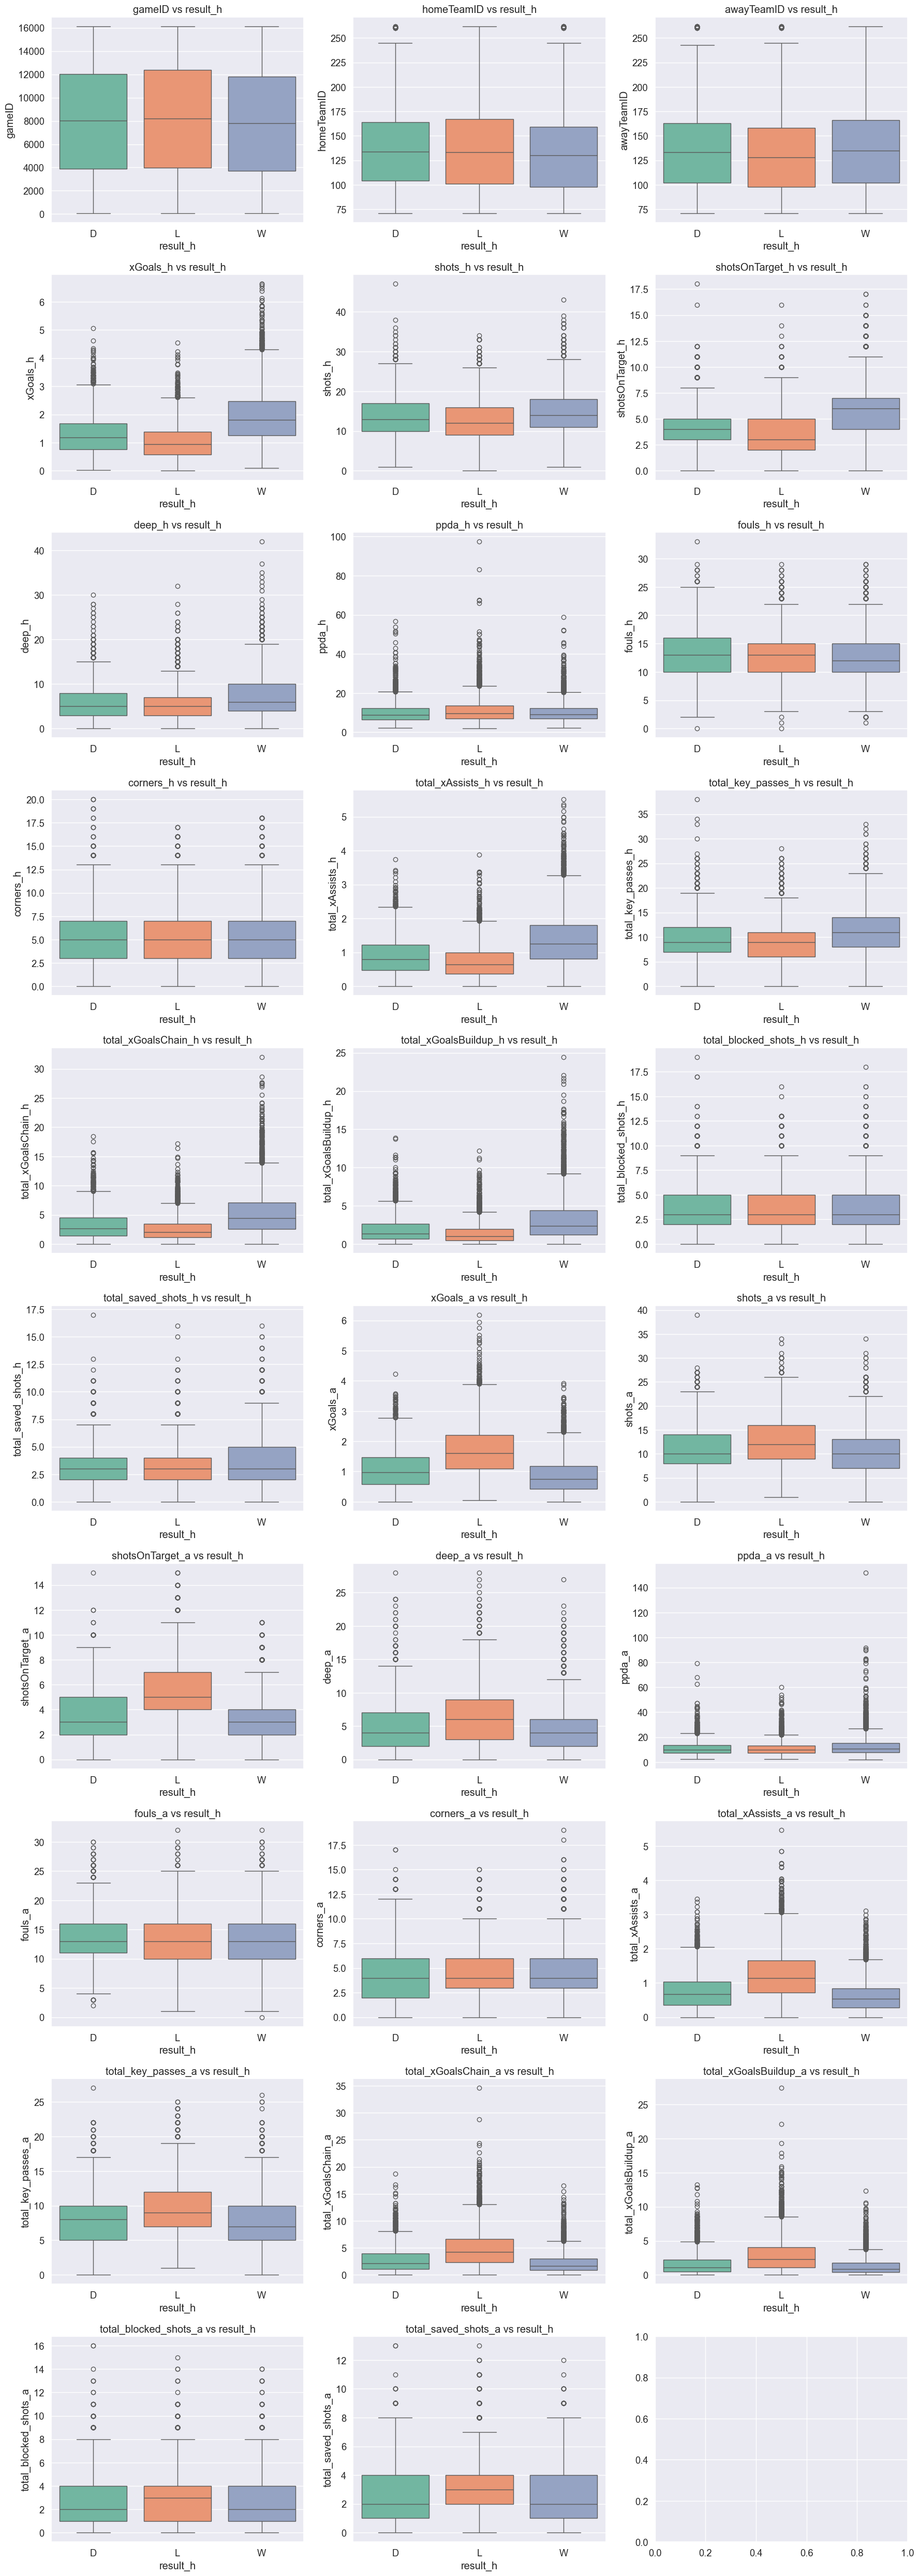

In [293]:
# Re-load necessary libraries after execution state reset
#import pandas as pd
#import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
#import math

# Define function to plot ANOVA results
def plot_anova_results(df, categorical_col):
    """
    Create boxplots to visualize ANOVA results.
    
    Parameters:
    - df: pandas DataFrame
    - categorical_col: The categorical column (e.g., 'result_h') to compare numeric features against.
    """
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    num_plots = len(numerical_cols)
    rows = math.ceil(num_plots / 3)  # Arrange in 3 columns

    fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 5))
    axes = axes.flatten()  # Flatten axes for easier indexing

    for i, col in enumerate(numerical_cols):
        sns.boxplot(x=df[categorical_col], y=df[col], palette="Set2", ax=axes[i])
        axes[i].set_title(f"{col} vs {categorical_col}")
        axes[i].set_xlabel(categorical_col)
        axes[i].set_ylabel(col)

    plt.tight_layout()
    plt.show()

# Generate ANOVA visualizations
plot_anova_results(df, "result_h")


In [294]:
df.columns

Index(['gameID', 'leagueID', 'season', 'date', 'homeTeamID', 'awayTeamID',
       'homeGoals', 'awayGoals', 'homeGoalsHalfTime', 'awayGoalsHalfTime',
       'xGoals_h', 'shots_h', 'shotsOnTarget_h', 'deep_h', 'ppda_h', 'fouls_h',
       'corners_h', 'yellowCards_h', 'redCards_h', 'teamgoals_h', 'ownGoals_h',
       'total_assists_h', 'total_xAssists_h', 'total_key_passes_h',
       'total_xGoalsChain_h', 'total_xGoalsBuildup_h', 'total_blocked_shots_h',
       'total_saved_shots_h', 'xGoals_a', 'shots_a', 'shotsOnTarget_a',
       'deep_a', 'ppda_a', 'fouls_a', 'corners_a', 'yellowCards_a',
       'redCards_a', 'teamgoals_a', 'ownGoals_a', 'total_assists_a',
       'total_xAssists_a', 'total_key_passes_a', 'total_xGoalsChain_a',
       'total_xGoalsBuildup_a', 'total_blocked_shots_a', 'total_saved_shots_a',
       'result_h', 'game_year', 'game_month', 'game_day', 'homeGoals_cat',
       'awayGoals_cat', 'homeGoalsHT_cat', 'awayGoalsHT_cat', 'redCards_h_cat',
       'redCards_a_cat', '

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12680 entries, 0 to 12679
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gameID                 12680 non-null  int64   
 1   leagueID               12680 non-null  category
 2   season                 12680 non-null  category
 3   date                   12680 non-null  object  
 4   homeTeamID             12680 non-null  int64   
 5   awayTeamID             12680 non-null  int64   
 6   homeGoals              12680 non-null  category
 7   awayGoals              12680 non-null  category
 8   homeGoalsHalfTime      12680 non-null  category
 9   awayGoalsHalfTime      12680 non-null  category
 10  xGoals_h               12046 non-null  float64 
 11  shots_h                12680 non-null  int64   
 12  shotsOnTarget_h        12680 non-null  int64   
 13  deep_h                 12046 non-null  float64 
 14  ppda_h                 12680 non-null 

In [296]:
df.to_csv(path_result+'/'+"football_after_EDA.csv")

In [297]:
Exploratory Data Analysis (EDA) Report – Football Match Data
1. Data Overview
The dataset contains 12,680 matches with 50 features related to team performance, disciplinary actions, and match results.
Categorical variables with fewer than 10 unique values were converted to the category type.
No duplicate rows were found, but some columns had missing values.
2. Descriptive Analysis
Skewness & Kurtosis: Most features are skewed, with only 5 columns close to normal distribution.
Histograms & Boxplots: homeGoals, awayGoals, and xGoals_h show distinct distributions for match outcomes.
3. Correlation & Statistical Tests
Correlation Analysis:
xGoals_h, teamgoals_h, and total_assists_h have strong positive correlations with match results.
Chi-Square Test: Red cards (redCards_h, redCards_a) significantly impact match outcomes (p < 0.001).
T-Test & ANOVA:
Expected goals (xGoals_h) are significantly higher in wins compared to losses (p < 0.001).
Shots (shots_h) show different distributions between wins and losses (p < 0.001, Kolmogorov-Smirnov test).
4. Key Insights
Performance Metrics Drive Results: Goals, assists, and expected goals are strong predictors of match outcomes.
Disciplinary Factors Matter: More red cards correlate with increased losses.
Time-Based Trends: Results vary significantly by season and game year.

SyntaxError: invalid character '–' (U+2013) (3694302229.py, line 1)